In [ ]:
from os import listdir
from os.path import isfile, join

from pathlib import Path

import ast

import networkx as nx

from collections import defaultdict

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np

from math import ceil

from algo.helpers import input_graph, input_generated_graph_and_processors_from_file

%matplotlib inline

In [3]:
graph_types: list[str] = [
    'layered',
    'random',
    'triangle',
]

path_greed: str = './results/greed/weighted/{graph_type}/{{graph_name}}'
path_greed_mk: str = './results/MK_greed_greed_weighted/weighted/{graph_type}/{{graph_name}}'
path_mk_geq_cr: str = './results/MK_greed_greed_with_geq_cr/weighted/{graph_type}/{{graph_name}}'
path_simple: str = './results/simple_part/weighted/{graph_type}/{{graph_name}}'

In [16]:
path_data_time: list[tuple[str, dict, dict]] = [
    (path_greed, greed_data := dict(), greed_time := dict()),
    (path_greed_mk, greed_mk_data := dict(), greed_mk_time := dict()),
    # (path_mk_geq_cr, data_mk_geq_cr := dict(), time_mk_geq_cr := dict()),
    (path_simple, simple_data := dict(), simple_time := dict()),
]

cr_set, pg_set = set(), set()
for path, data, times in path_data_time:
    for graph_type in graph_types:
        # время
        if graph_type not in times:
            times[graph_type] = dict()
        files = list(filter(lambda x: x.endswith('.time'), listdir(path.format(graph_type=graph_type).removesuffix('/{graph_name}'))))
        for graph_name in files:
            
            times[graph_type][graph_name] = defaultdict(dict)
            with open(path.format(graph_type=graph_type).format(graph_name=graph_name), 'r') as file:
                for line in file.readlines():
                    line = line.strip()
                    try:
                        # triadag20_5.txt 3_2x4.txt 0.3 210 1740493448.3341758 6804.933112382889 
                        g_name, pg_name, cr_lim, partition_ken, start_time, overall_time = line.split()
                        if g_name.replace('.txt', '.time') != graph_name.split('/')[-1]:
                            continue
                        cr_lim, partition_ken, start_time, overall_time = float(cr_lim), int(partition_ken) if partition_ken != 'None' else None, float(start_time), float(overall_time)
                    except Exception as e:
                        print(cr_lim, partition_ken, start_time, overall_time)
                        print(e)
                        print(line)
                        print(path)
                        continue

                    pg_name = pg_name.removesuffix('.txt')
                    pg_name = '_'.join(list(map(str, sorted(list(map(int, pg_name.split('x')[0].split('_'))), reverse=True)))) + 'x' + pg_name.split('x')[1]
                    
                    cr_set.add(cr_lim)
                    pg_set.add(pg_name)
                    times[graph_type][graph_name][pg_name][cr_lim] = float(overall_time)
        # ЦФы
        if graph_type not in data:
            data[graph_type] = dict()
        print(path.format(graph_type=graph_type).removesuffix('/{graph_name}'))
        files = list(filter(lambda x: x.endswith('.txt'), listdir(path.format(graph_type=graph_type).removesuffix('/{graph_name}'))))
        for graph_name in files:
            data[graph_type][graph_name] = defaultdict(dict)
            with open(path.format(graph_type=graph_type).format(graph_name=graph_name), 'r') as file:
                for line in file.readlines():
                    line = line.strip()
                    try:
                        g_name, pg_name, cr, cr_lim, f_val, *_ = line.split()
                        if g_name != graph_name.split('/')[-1]:
                            continue
                        cr, cr_lim, f_val = float(cr) if cr != 'None' else None, float(cr_lim), float(f_val)
                    except Exception as e:
                        print(cr, cr_lim, f_val)
                        print(e)
                        print(line)
                        print(path)
                        continue

                    pg_name = pg_name.removesuffix('.txt')
                    pg_name = '_'.join(list(map(str, sorted(list(map(int, pg_name.split('x')[0].split('_'))), reverse=True)))) + 'x' + pg_name.split('x')[1]
                    
                    cr_set.add(cr_lim)
                    pg_set.add(pg_name)
                    data[graph_type][graph_name][pg_name][cr_lim] = float(f_val)


./results/greed/weighted/layered
./results/greed/weighted/random
./results/greed/weighted/triangle
./results/MK_greed_greed_weighted/weighted/layered
./results/MK_greed_greed_weighted/weighted/random
./results/MK_greed_greed_weighted/weighted/triangle
./results/simple_part/weighted/layered
./results/simple_part/weighted/random
./results/simple_part/weighted/triangle


In [23]:
for graph_type in greed_mk_data.keys():
    for graph_name in greed_mk_data[graph_type].keys():
        cnt = 0
        for pg_name in greed_mk_data[graph_type][graph_name].keys():
            for cr in greed_mk_data[graph_type][graph_name][pg_name].keys():
                cnt += 1
        if cnt != len(cr_set) * len(pg_set):
            greed_mk_data[graph_type].pop(graph_name, None)
            greed_mk_time[graph_type].pop(graph_name, None)
            print('popped', graph_name)

In [46]:
graph_paths: list[tuple[str, str]] = [
    # ('./data/random/', 'random'),
    ('./data/layered/', 'layered'),
    # ('./data/triangle/', 'triangle'),
]

dict_keys(['dagK43.txt', 'dagE8.txt', 'dagK46.txt', 'dagA15.txt', 'dagO36.txt', 'dagN37.txt', 'dagF13.txt', 'dagR56.txt', 'dagJ57.txt', 'dagF33.txt', 'dagP65.txt', 'dagJ45.txt', 'dagG33.txt', 'dagE35.txt', 'dagA14.txt', 'dagA20.txt', 'dagA3.txt', 'dagA11.txt', 'dagD33.txt', 'dagJ29.txt', 'dagD30.txt', 'dagC19.txt', 'dagD13.txt', 'dagD20.txt', 'dagA7.txt', 'dagN42.txt', 'dagH14.txt', 'dagN22.txt', 'dagI30.txt', 'dagL25.txt', 'dagI45.txt', 'dagD23.txt', 'dagB3.txt', 'dagL44.txt', 'dagI43.txt', 'dagQ20.txt', 'dagA5.txt', 'dagI40.txt', 'dagR58.txt', 'dagQ13.txt', 'dagO13.txt', 'dagK35.txt', 'dagM12.txt', 'dagJ52.txt', 'dagK51.txt', 'dagQ16.txt', 'dagD4.txt', 'dagM4.txt', 'dagN5.txt', 'dagA0.txt', 'dagP41.txt', 'dagR72.txt', 'dagR40.txt', 'dagD0.txt', 'dagE37.txt', 'dagC14.txt', 'dagC38.txt', 'dagF9.txt', 'dagG31.txt', 'dagM14.txt', 'dagJ28.txt', 'dagH47.txt', 'dagA6.txt', 'dagK29.txt', 'dagJ59.txt', 'dagP29.txt', 'dagC23.txt', 'dagO32.txt', 'dagB38.txt', 'dagJ25.txt', 'dagG45.txt', 'dagB8.

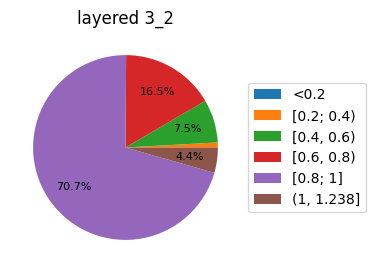

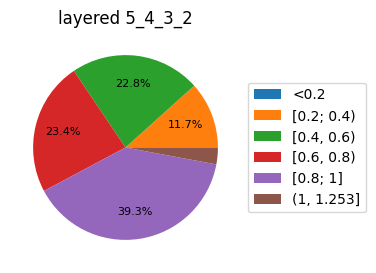

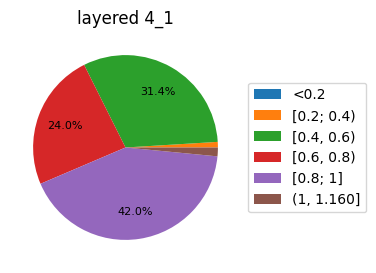

In [39]:
def func(pct, allvals):
    # absolute = int(np.round(pct/100.*np.sum(allvals)))
    if pct >= 3:
        return f"{pct:.1f}%"
    else:
        return ""

proc_classes: list[str] = ['3_2', '5_4_3_2', '4_1']

for graphs_path, graph_type in graph_paths:
    graph_names = greed_mk_data[graph_type].keys()
    print(graph_names)
    for proc_class in proc_classes:
        fractions: list = []
        for graph_name in graph_names:
            for proc in filter(lambda x: x.startswith(proc_class), greed_mk_data[graph_type][graph_name].keys()):
                for cr in filter(lambda x: x <= 0.6, greed_mk_data[graph_type][graph_name][proc].keys()):
                    val = greed_mk_data[graph_type][graph_name][proc][cr] / greed_data[graph_type][graph_name][proc][cr]
                    if val <= 0.001:
                        val = greed_mk_data[graph_type][graph_name][proc][cr] / simple_data[graph_type][graph_name][proc][cr]
                    fractions.append((val, graph_name, proc, cr))

        vals = [0 for _ in range(6)]        
        for i, *_ in fractions:
            if i < 0.2:
                ind = 0
            elif 0.2 <= i < 0.4:
                ind = 1
            elif 0.4 <= i < 0.6:
                ind = 2
            elif 0.6 <= i < 0.8:
                ind = 3
            elif 0.8 <= i <= 1:
                ind = 4
            else:
                ind = 5
                # print(i, _)
 
            vals[ind] += 1 

        data = np.array(vals)
        
        # plt.title(f'{title} {proc_class}')
        mylabels = ["<0.2", "[0.2; 0.4)", "[0.4, 0.6)", "[0.6, 0.8)", "[0.8; 1]", f"(1, {max(fractions, key=lambda x: x[0])[0]:.3f}]"]
        title = graph_type if graph_type != 'sausages' else 'layered'
        
        fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
        ax.set_title(f'{title} {proc_class}')        

        wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), pctdistance=0.7,
                                  textprops=dict(color="black"))

        ax.legend(wedges, mylabels,
                # title="Ingredients",
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=8)

        ax.set_title(f'{title} {proc_class}')

        Path(f'./pics/{title}/pics_total/').mkdir(parents=True, exist_ok=True)
        plt.savefig(f'./pics/{title}/pics_total/{title}_{proc_class}.png')
        plt.show()
        plt.close()

['dagA0.time', 'dagA11.time', 'dagA12.time', 'dagA14.time', 'dagA15.time', 'dagA17.time', 'dagA19.time', 'dagA2.time', 'dagA20.time', 'dagA21.time', 'dagA22.time', 'dagA24.time', 'dagA26.time', 'dagA29.time', 'dagA3.time', 'dagA31.time', 'dagA34.time', 'dagA38.time', 'dagA39.time', 'dagA5.time', 'dagA6.time', 'dagA7.time', 'dagA9.time', 'dagB0.time', 'dagB10.time', 'dagB11.time', 'dagB14.time', 'dagB15.time', 'dagB17.time', 'dagB18.time', 'dagB19.time', 'dagB2.time', 'dagB28.time', 'dagB29.time', 'dagB3.time', 'dagB31.time', 'dagB35.time', 'dagB38.time', 'dagB39.time', 'dagB4.time', 'dagB6.time', 'dagB8.time', 'dagB9.time', 'dagC11.time', 'dagC12.time', 'dagC14.time', 'dagC18.time', 'dagC19.time', 'dagC2.time', 'dagC22.time', 'dagC23.time', 'dagC24.time', 'dagC25.time', 'dagC29.time', 'dagC3.time', 'dagC31.time', 'dagC32.time', 'dagC33.time', 'dagC35.time', 'dagC37.time', 'dagC38.time', 'dagC7.time', 'dagC9.time', 'dagD0.time', 'dagD10.time', 'dagD13.time', 'dagD16.time', 'dagD19.time'

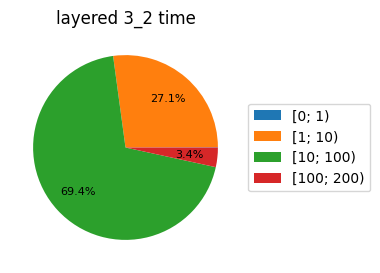

100.08514618873596 dagP17.time 5_4_3_2x2 0.55
100.1020576953888 dagP17.time 5_4_3_2x3 0.5
104.08626699447632 dagP17.time 5_4_3_2x1 0.35
103.16478896141052 dagP17.time 5_4_3_2x4 0.3
112.3165340423584 dagP21.time 5_4_3_2x5 0.3
101.88203024864197 dagP23.time 5_4_3_2x2 0.4
100.67017865180969 dagP23.time 5_4_3_2x5 0.4
100.31083607673645 dagP23.time 5_4_3_2x5 0.55
100.92297101020813 dagP23.time 5_4_3_2x5 0.6
112.85495376586914 dagP23.time 5_4_3_2x5 0.45
103.78617906570435 dagP23.time 5_4_3_2x3 0.3
101.17786812782288 dagP23.time 5_4_3_2x3 0.55
100.72604274749756 dagP23.time 5_4_3_2x3 0.6
104.1173505783081 dagP23.time 5_4_3_2x1 0.35
108.00708889961243 dagP23.time 5_4_3_2x1 0.3
100.57636022567749 dagP23.time 5_4_3_2x1 0.45
110.3107328414917 dagP23.time 5_4_3_2x1 0.4
106.30289578437805 dagP23.time 5_4_3_2x1 0.55
102.60668063163757 dagP23.time 5_4_3_2x4 0.3
108.54872798919678 dagP23.time 5_4_3_2x4 0.35
100.1602635383606 dagP38.time 5_4_3_2x2 0.45
100.77758836746216 dagP38.time 5_4_3_2x5 0.45
100.

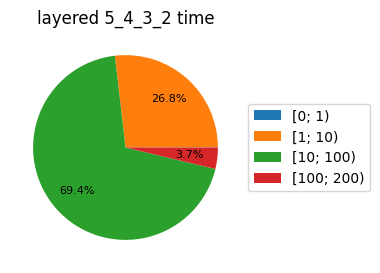

102.74959063529968 dagP17.time 4_1x4 0.25
100.29011583328247 dagP17.time 4_1x4 0.4
105.38912725448608 dagP17.time 4_1x4 0.35
102.2047369480133 dagP17.time 4_1x4 0.55
108.73012161254883 dagP23.time 4_1x5 0.3
104.47848105430603 dagP23.time 4_1x4 0.3
102.22234010696411 dagP23.time 4_1x4 0.35
101.13970422744751 dagP23.time 4_1x4 0.45
100.8922233581543 dagP23.time 4_1x4 0.55
103.31042337417603 dagP23.time 4_1x4 0.6
103.76720428466797 dagP23.time 4_1x2 0.3
100.84905219078064 dagP23.time 4_1x2 0.45
105.64507603645325 dagP23.time 4_1x2 0.35
114.22136640548706 dagP23.time 4_1x2 0.4
107.33950066566467 dagP23.time 4_1x2 0.65
109.94188213348389 dagP23.time 4_1x3 0.3
112.70066261291504 dagP23.time 4_1x3 0.4
111.32791018486023 dagP23.time 4_1x3 0.5
110.74752497673035 dagP23.time 4_1x3 0.55
101.09770250320435 dagP26.time 4_1x5 0.3
103.12022662162781 dagP26.time 4_1x4 0.3
101.79003977775574 dagP47.time 4_1x5 0.25
104.26724028587341 dagP47.time 4_1x5 0.45
106.16001629829407 dagP47.time 4_1x5 0.4
109.19

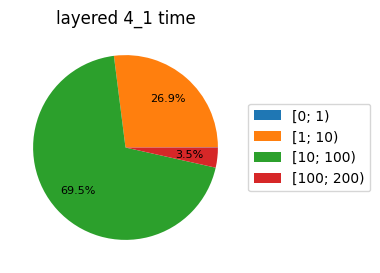

In [40]:
def roundup(x, n):
    n -= 2
    return int(ceil(x / 10**n)) * 10**n


for graphs_path, graph_type in graph_paths:
    graph_names = sorted(greed_mk_time[graph_type].keys())
    print(graph_names)
    for proc_class in proc_classes:
        fractions: list = []
        for graph_name in graph_names:
            for proc in filter(lambda x: x.startswith(proc_class), greed_mk_time[graph_type][graph_name].keys()):
                # for cr in filter(lambda x: x <= 0.6, greed_mk_time[graph_type][graph_name][proc].keys()):
                for cr in greed_mk_time[graph_type][graph_name][proc].keys():
                    val = greed_mk_time[graph_type][graph_name][proc][cr]
                    if val > 100:
                        print(val, graph_name, proc, cr)
                    fractions.append(val)

        vals = [0 for _ in range(6)]        
        for i in fractions:
            if i < 1:
                ind = 0
            elif i < 10:
                ind = 1
            elif i < 100:
                ind = 2
            elif i < 1000:
                ind = 3
            elif i < 10000:
                ind = 4
            else:
                ind = 5
 
            vals[ind] += 1

        while vals[-1] == 0:
            vals.pop()
        vals = np.array(vals)
        print(vals)
        
        mylabels = ['[0; 1)', '[1; 10)', f'[10; {min(100, roundup(max(fractions), len(vals)))})', f'[100; {min(1000, roundup(max(fractions), len(vals)))})', f'[1000; {min(10000, roundup(max(fractions), len(vals)))})', f'[10000; {roundup(max(fractions), len(vals))})']
        mylabels = mylabels[:len(vals)]

        data = np.array(vals)
        title = graph_type if graph_type != 'sausages' else 'layered'
        
        fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
        ax.set_title(f'{title} {proc_class}')        

        wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), pctdistance=0.7,
                                  textprops=dict(color="black"))
        ax.legend(wedges, mylabels,
                # title="Ingredients",
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=8)

        ax.set_title(f'{title} {proc_class} time')

        Path(f'./pics/{title}/pics_total/').mkdir(parents=True, exist_ok=True)
        plt.savefig(f'./pics/{title}/pics_total/{title}_{proc_class}_time.png')
        plt.show()
        plt.close()

In [41]:
def plot_heatmap(data, col_labels, row_labels, title, valfmt: str ="{x:3.1f}", threshold: float|None=None, abs_threshold: bool=False):
    fig, ax = plt.subplots(figsize=(len(col_labels)//2, len(row_labels) + 3))
    im = ax.imshow(data)
    
    ax.set_xticks(range(data.shape[1]), labels=col_labels,
            rotation=-30, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.tick_params(which="minor", bottom=False, left=False)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    
    if threshold is None:
        threshold = im.norm(data.max())/2.
    
    kw = dict(
        horizontalalignment="center",
        verticalalignment="center",
    )
    textcolors=("white", "black")
    
    valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if abs_threshold:
                kw.update(color=textcolors[int(data[i, j] > threshold)])
            else:
                kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    ax.set_title(title)

    fig.tight_layout()
    
    return fig, ax, texts

In [ ]:
for graphs_path, graph_type in graph_paths:
    # files = sorted(list(filter(lambda x: x.endswith('.txt'), listdir(graphs_path.format(graph_type=graph_type).removesuffix('/{graph_name}')))))
    files = greed_mk_time[graph_type].keys()
    for graph_name in files:
        pg_names0 = list(greed_mk_data[graph_type][graph_name].keys())
        pgs = list(set(pg.split('x')[0] for pg in pg_names0))
        print(graph_name)
        for pg in pgs:
            pg_names = list(filter(lambda x: x.startswith(pg) , pg_names0))
            cr_list = sorted(list(greed_mk_data[graph_type][graph_name][pg_names[0]].keys()))
            
            pg_names = list(sorted( pg_names, key=lambda x: int(x.split('x')[1]), reverse=True, ))

            heats = [[] for _ in pg_names]
            simple = [[] for _ in pg_names]
            
            for i, pg_name in enumerate(pg_names):
                for cr in cr_list:
                    heats[i].append(
                        greed_mk_data[graph_type][graph_name][pg_name][cr] / greed_data[graph_type][graph_name][pg_name][cr]
                    )   

                    simple[i].append(
                        greed_mk_data[graph_type][graph_name][pg_name][cr] / simple_data[graph_type][graph_name][pg_name][cr]
                    )
            
            heats = np.array(heats)
            simple = np.array(simple)
            
            title = f'{graph_name}\n\n' + f'F(ПЖ_МК{"_CR+" if "geq_cr" in path_greed_mk else ""})/F(Greedy_Reg)'
            title = title.replace("sausages", "layered")
            
            fig, ax, texts = plot_heatmap(heats, cr_list, pg_names, title, valfmt="{x:.2f}", threshold=0.7, abs_threshold=True)
            
            # Loop over data dimensions and create text annotations.
            for i in range(len(pg_names)):
                for j in range(len(cr_list)):
                    if heats[i, j] <= 0.001:
                        val = f'[{simple[i, j]:.2f}]'
                        texts[i*len(cr_list) + j].set(text=f'{val}', ha="center", va="center", color="w")

            Path(f'./pics/{graph_type}/result/{graph_name.removesuffix(".txt")}').mkdir(parents=True, exist_ok=True)
            fig.savefig(f'./pics/{graph_type}/result/{graph_name.removesuffix(".txt")}/{graph_name.removesuffix(".txt")}_{pg}.png')
            # plt.show()
            plt.close(fig)

In [43]:
for graphs_path, graph_type in graph_paths:
    files = greed_mk_time[graph_type].keys()
    for graph_name in files:
        graph_name = graph_name.replace('.txt', '.time')
        print(graph_name)
        
        pg_names0 = list(greed_mk_time[graph_type][graph_name].keys())
        pgs = list(set(pg.split('x')[0] for pg in pg_names0))
        for pg in pgs:
            pg_names = list(filter(lambda x: x.startswith(pg) , pg_names0))
            cr_list = sorted(list(greed_mk_time[graph_type][graph_name][pg_names[0]].keys()))
            
            pg_names = list(sorted( pg_names, key=lambda x: int(x.split('x')[1]), reverse=True, ))

            heats = [[] for _ in pg_names]
            
            for i, pg_name in enumerate(pg_names):
                for cr in cr_list:
                    heats[i].append(
                        greed_mk_time[graph_type][graph_name][pg_name][cr]
                    )   
            
            heats = np.array(heats) 
            
            alg_class = "Кластерный алгоритм"
            title = f'{graph_name}\n{alg_class}\nВремя выполнения (с)'
            title = title.replace("sausages", "layered")
            
            fig, ax, texts = plot_heatmap(heats, cr_list, pg_names, title, threshold=0.7)
            
            Path(f'./pics/{graph_type}/time//{graph_name.removesuffix(".txt")}').mkdir(parents=True, exist_ok=True)
            fig.savefig(f'./pics/{graph_type}/time//{graph_name.removesuffix(".txt")}/{graph_name.removesuffix(".txt")}_{pg}.png', bbox_inches='tight')
            # plt.show()
            plt.close(fig)

dagN7.time
dagN10.time
dagC11.time
dagR20.time
dagF34.time
dagI30.time
dagF33.time
dagC37.time
dagQ62.time
dagR68.time
dagH27.time
dagP64.time
dagC7.time
dagP18.time
dagA15.time
dagQ42.time
dagM25.time
dagP38.time
dagD0.time
dagQ41.time
dagL41.time
dagM6.time
dagC25.time
dagA21.time
dagC14.time
dagO37.time
dagH42.time
dagA0.time
dagD13.time
dagK51.time
dagE38.time
dagK29.time
dagP16.time
dagH28.time
dagF48.time
dagE10.time
dagL50.time
dagO67.time
dagR72.time
dagG21.time
dagA26.time
dagC24.time
dagE26.time
dagE35.time
dagB0.time
dagN29.time
dagN33.time
dagJ32.time
dagG49.time
dagF3.time
dagO32.time
dagJ29.time
dagC3.time
dagD33.time
dagG12.time
dagJ30.time
dagA24.time
dagH39.time
dagA3.time
dagF22.time
dagR58.time
dagC19.time
dagJ26.time
dagP37.time
dagI31.time
dagF35.time
dagG13.time
dagL21.time
dagO64.time
dagO16.time
dagP69.time
dagA29.time
dagC2.time
dagP17.time
dagP24.time
dagL15.time
dagR14.time
dagL22.time
dagJ20.time
dagI42.time
dagQ16.time
dagN21.time
dagQ20.time
dagR13.time
da

In [ ]:
for graphs_path, graph_type in graph_paths:
    n_min, n_max = 10**10, 0
    e_min, e_max = 10**10, 0
    rho_min, rho_max = 10**10, 0
    rho_s = []
    graph_cnt = 0
    
    for graph_name in listdir(graphs_path):
        g = input_graph(graphs_path + graph_name)
        graph_cnt += 1
        n_min, n_max = min(n_min, len(g.nodes)), max(n_max, len(g.nodes))
        e_min, e_max = min(e_min, len(g.edges)), max(e_max, len(g.edges))
        rho = len(g.edges) / (len(g.nodes))
        rho_min, rho_max = min(rho_min, rho), max(rho_max, rho)
        rho_s.append(rho)
        
    graph_type = graph_type.replace("triangle", "triangle_up_to_30")
    print(graph_type)
    print(f'Количество графов: {graph_cnt}')
    print(f'N_min = {n_min}, N_max = {n_max}')
    print(f'E_min = {e_min}, E_max = {e_max}')
    print(f'ρ_min = {rho_min:.2f}, ρ_max = {rho_max:.2f}')
    print(f'ρ_среднее = {np.mean(rho_s):.2f}')
    print()

layered
Количество графов: 361
N_min = 50, N_max = 200
E_min = 141, E_max = 610
ρ_min = 2.64, ρ_max = 3.20
ρ_среднее = 2.99



: 